# TensorFlow with Keras Interface

In [1]:
%matplotlib inline
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from __future__ import print_function
import matplotlib.pyplot as plt

Using TensorFlow backend.


## 1. Loading the Data

In [2]:
# get MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# input image dimensions
img_rows, img_cols = 28, 28

## 2. Displaying the Training Data in Images

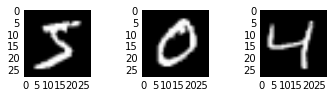

In [3]:
# display a few training images
plt.subplot(331)
plt.imshow(x_train[0].reshape(img_rows,img_cols), cmap=plt.get_cmap('gray'))
plt.subplot(332)
plt.imshow(x_train[1].reshape(img_rows,img_cols), cmap=plt.get_cmap('gray'))
plt.subplot(333)
plt.imshow(x_train[2].reshape(img_rows,img_cols), cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

## 3. Preparing the Data

In [4]:
input_shape = img_rows * img_cols

# convert the 3-d arrays into matrices. 28x28 images are flattened into length 784 vectors.
x_train = x_train.reshape(60000, input_shape)
x_test = x_test.reshape(10000, input_shape)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# convert the grayscale values from integers ranging between 0 to 255 into floating point values ranging between 0 and 1.
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [5]:
# one-hot encode the y integer vectors into binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## 4. Defining the Model

In [6]:
# creating a sequential model and then adding layers
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(input_shape,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

## 5. Displaying the Details of the Model

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## 6. Compiling the Model

In [ ]:
# compile the model with appropriate loss function, optimizer, and metrics
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=RMSprop(), metrics=['accuracy'])

## 7. Training the Model

In [ ]:
# Use the fit() function to train the model for 10 epochs using batches of 128 images
history = model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 15s - loss: 0.2477 - acc: 0.9239 - val_loss: 0.1124 - val_acc: 0.9651
Epoch 2/15
60000/60000 [==============================] - 14s - loss: 0.1009 - acc: 0.9690 - val_loss: 0.0865 - val_acc: 0.9735
Epoch 3/15
60000/60000 [==============================] - 14s - loss: 0.0735 - acc: 0.9773 - val_loss: 0.0796 - val_acc: 0.9766
Epoch 4/15
60000/60000 [==============================] - 14s - loss: 0.0594 - acc: 0.9819 - val_loss: 0.0837 - val_acc: 0.9767
Epoch 5/15
60000/60000 [==============================] - 15s - loss: 0.0510 - acc: 0.9848 - val_loss: 0.0824 - val_acc: 0.9781
Epoch 6/15
60000/60000 [==============================] - 15s - loss: 0.0437 - acc: 0.9869 - val_loss: 0.0803 - val_acc: 0.9808
Epoch 7/15
60000/60000 [==============================] - 15s - loss: 0.0374 - acc: 0.9892 - val_loss: 0.0804 - val_acc: 0.9816
Epoch 8/15
60000/60000 [==============================

## 8. Display the Training Detail

In [ ]:
# display all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 9 Evaluating the Model

In [ ]:
# Evaluate the model's performance on the test data:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

## 10 Generate Predictions with the Test Data

In [ ]:
# Generate predictions on test data:
classes = model.predict_classes(x_test, batch_size=1)
print(classes)

## 11. Displaying the Test Data in Images

In [ ]:
# display a few test images
plt.subplot(331)
plt.imshow(x_test[0].reshape(img_rows,img_cols), cmap=plt.get_cmap('gray'))
plt.subplot(332)
plt.imshow(x_test[1].reshape(img_rows,img_cols), cmap=plt.get_cmap('gray'))
plt.subplot(333)
plt.imshow(x_test[2].reshape(img_rows,img_cols), cmap=plt.get_cmap('gray'))
# show the plot
plt.show()